In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\Swapna\Downloads\Indian_Domestic_Airline.csv')
df.head()

,AirLine_Name,Rating - 10,Title,Name,Date,Review,Recommond
0,AirAsia India,6.0,"""crew were welcoming""",V Bakshi,14th October 2023,✅ Trip Verified | I had booked this fare at a ...,yes
1,AirAsia India,1.0,"""furious and disappointed""",G Oscar,14th October 2023,✅ Trip Verified | I travel at least four times...,no
2,AirAsia India,10.0,"""amazing service and support""",Rahul Verma,14th October 2023,✅ Trip Verified | Taking this opportunity to a...,yes
3,AirAsia India,1.0,"""Waste of time and money""",G Akron,14th October 2023,✅ Trip Verified | The worst airlines in the hi...,no
4,AirAsia India,8.0,"""thumbs up to boarding crew""",Sirajudeen Jawahar ali,14th October 2023,✅ Trip Verified | Would like to give big thum...,yes


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AirLine_Name  2210 non-null   object 
 1   Rating - 10   2206 non-null   float64
 2   Title         2210 non-null   object 
 3   Name          2210 non-null   object 
 4   Date          2210 non-null   object 
 5   Review        2210 non-null   object 
 6   Recommond     2210 non-null   object 
dtypes: float64(1), object(6)
memory usage: 121.0+ KB


Text(0, 0.5, 'Frequency')

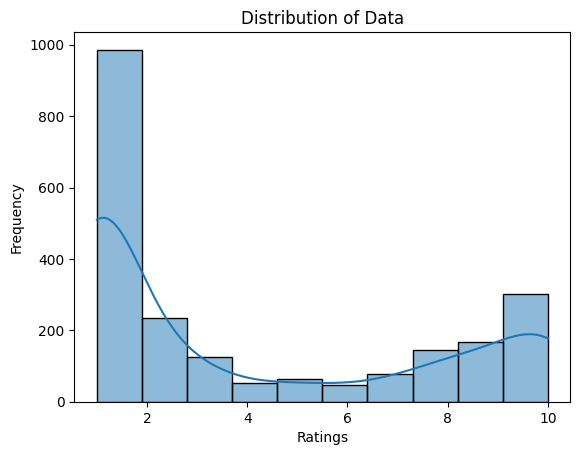

In [6]:
sns.histplot(df['Rating - 10'],bins=10,kde=True)
plt.title('Distribution of Data')
plt.xlabel('Ratings')
plt.ylabel('Frequency')


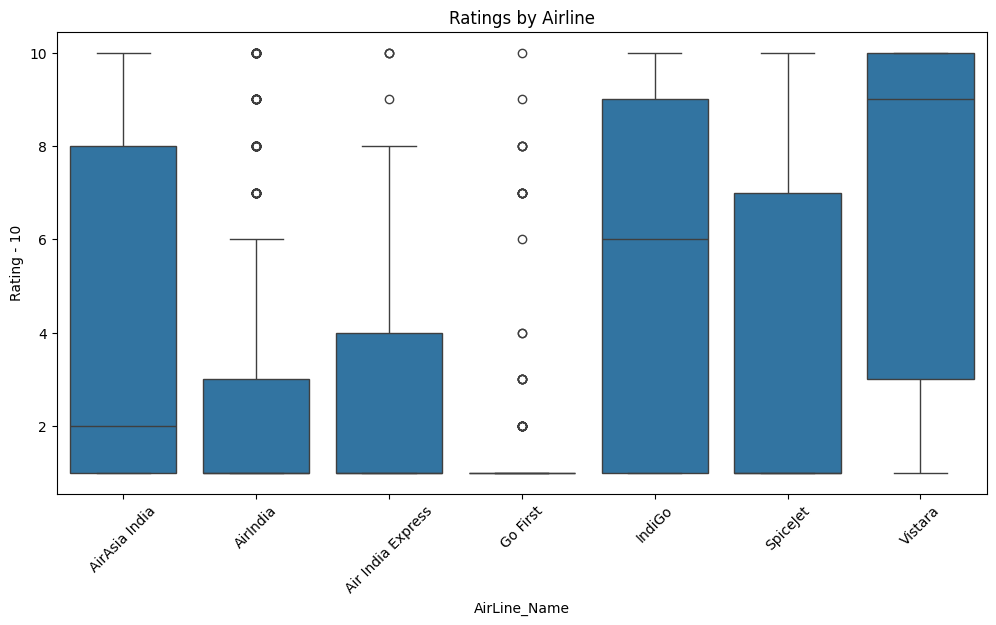

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(x='AirLine_Name',y='Rating - 10',data=df)
plt.title('Ratings by Airline')
plt.xticks(rotation=45)
plt.show()

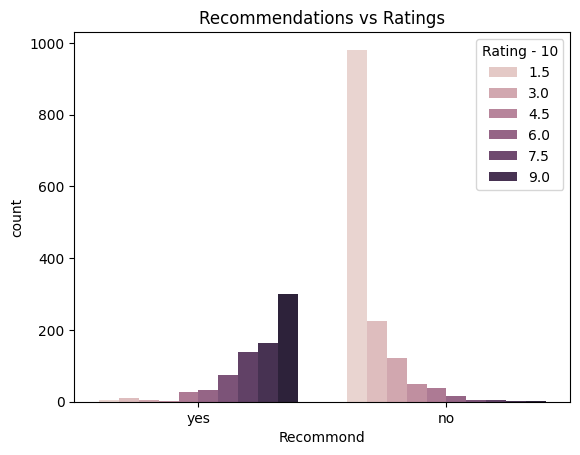

In [8]:
sns.countplot(x='Recommond',hue='Rating - 10',data=df)
plt.title('Recommendations vs Ratings')
plt.show()

In [11]:
from textblob import TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

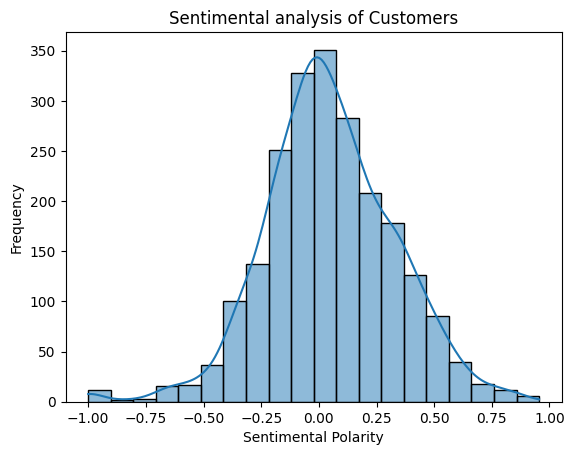

In [12]:
df['Sentiment']=df['Review'].apply(get_sentiment)
sns.histplot(df['Sentiment'],bins=20,kde=True)
plt.title('Sentimental analysis of Customers')
plt.xlabel('Sentimental Polarity')
plt.ylabel('Frequency')
plt.show()

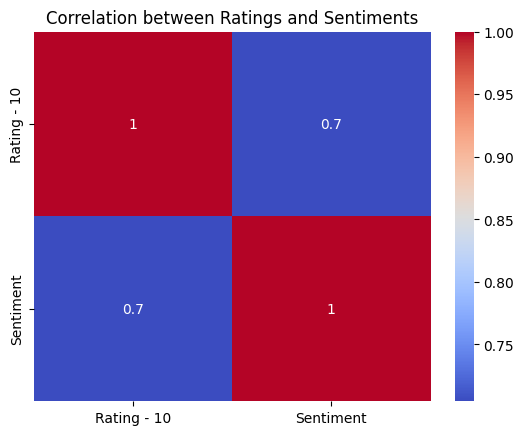

In [13]:
correlation=df[['Rating - 10','Sentiment']].corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Correlation between Ratings and Sentiments')
plt.show()

In [17]:
average_scores=df.groupby('AirLine_Name').agg({
    'Rating - 10':'mean',
    'Sentiment':'mean'
}).reset_index()
average_scores.columns=['AirLine_Name','Average_Rating','Average_Sentiment']
df=df.merge(average_scores,on='AirLine_Name',how='left')


In [18]:
df['Combined_Score']=(df['Average_Rating']+df['Average_Sentiment'])/2

In [26]:
pd.set_option('display.max_columns',None)
df.head()

,AirLine_Name,Rating - 10,Title,Name,Date,Review,Recommond,Sentiment,Average_Rating_x,Average_Sentiment_x,Average_Rating_y,Average_Sentiment_y,Average_Rating,Average_Sentiment,Combined_Score
0,AirAsia India,6.0,"""crew were welcoming""",V Bakshi,14th October 2023,✅ Trip Verified | I had booked this fare at a ...,yes,0.150694,4.0,0.061207,4.0,0.061207,4.0,0.061207,2.030603
1,AirAsia India,1.0,"""furious and disappointed""",G Oscar,14th October 2023,✅ Trip Verified | I travel at least four times...,no,-0.381250,4.0,0.061207,4.0,0.061207,4.0,0.061207,2.030603
2,AirAsia India,10.0,"""amazing service and support""",Rahul Verma,14th October 2023,✅ Trip Verified | Taking this opportunity to a...,yes,0.249150,4.0,0.061207,4.0,0.061207,4.0,0.061207,2.030603
3,AirAsia India,1.0,"""Waste of time and money""",G Akron,14th October 2023,✅ Trip Verified | The worst airlines in the hi...,no,-0.666667,4.0,0.061207,4.0,0.061207,4.0,0.061207,2.030603
4,AirAsia India,8.0,"""thumbs up to boarding crew""",Sirajudeen Jawahar ali,14th October 2023,✅ Trip Verified | Would like to give big thum...,yes,0.270000,4.0,0.061207,4.0,0.061207,4.0,0.061207,2.030603


In [27]:
print(df[['AirLine_Name','Average_Rating','Average_Sentiment','Combined_Score']].tail())

     AirLine_Name  Average_Rating  Average_Sentiment  Combined_Score
2205      Vistara        6.830769           0.232636        3.531702
2206      Vistara        6.830769           0.232636        3.531702
2207      Vistara        6.830769           0.232636        3.531702
2208      Vistara        6.830769           0.232636        3.531702
2209      Vistara        6.830769           0.232636        3.531702


In [28]:
df=pd.get_dummies(df,columns=['AirLine_Name'],prefix='AirLine_Name')
df.head()

,Rating - 10,Title,Name,Date,Review,Recommond,Sentiment,Average_Rating_x,Average_Sentiment_x,Average_Rating_y,Average_Sentiment_y,Average_Rating,Average_Sentiment,Combined_Score,AirLine_Name_Air India Express,AirLine_Name_AirAsia India,AirLine_Name_AirIndia,AirLine_Name_Go First,AirLine_Name_IndiGo,AirLine_Name_SpiceJet,AirLine_Name_Vistara
0,6.0,"""crew were welcoming""",V Bakshi,14th October 2023,✅ Trip Verified | I had booked this fare at a ...,yes,0.150694,4.0,0.061207,4.0,0.061207,4.0,0.061207,2.030603,False,True,False,False,False,False,False
1,1.0,"""furious and disappointed""",G Oscar,14th October 2023,✅ Trip Verified | I travel at least four times...,no,-0.381250,4.0,0.061207,4.0,0.061207,4.0,0.061207,2.030603,False,True,False,False,False,False,False
2,10.0,"""amazing service and support""",Rahul Verma,14th October 2023,✅ Trip Verified | Taking this opportunity to a...,yes,0.249150,4.0,0.061207,4.0,0.061207,4.0,0.061207,2.030603,False,True,False,False,False,False,False
3,1.0,"""Waste of time and money""",G Akron,14th October 2023,✅ Trip Verified | The worst airlines in the hi...,no,-0.666667,4.0,0.061207,4.0,0.061207,4.0,0.061207,2.030603,False,True,False,False,False,False,False
4,8.0,"""thumbs up to boarding crew""",Sirajudeen Jawahar ali,14th October 2023,✅ Trip Verified | Would like to give big thum...,yes,0.270000,4.0,0.061207,4.0,0.061207,4.0,0.061207,2.030603,False,True,False,False,False,False,False


In [30]:
X=df[['Average_Rating','Average_Sentiment']]
y=df.filter(like='AirLine_Name_')

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score


In [64]:
airline_columns=[col for col in df.columns if col.startswith('AirLine_Name_')]

In [65]:
print(f"Number of airlines to predict: {len(airline_columns)}")

Number of airlines to predict: 7


In [66]:
for airline in airline_columns:
    X=df[['Average_Rating','Average_Sentiment']]
    y=df[airline]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    model=RandomForestClassifier(random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f'Results for {airline}:')
    print(classification_report(y_test,y_pred))
    print(f'Accuracy: {accuracy_score(y_test,y_pred)}')

Results for AirLine_Name_Air India Express:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       428
        True       1.00      1.00      1.00        14

    accuracy                           1.00       442
   macro avg       1.00      1.00      1.00       442
weighted avg       1.00      1.00      1.00       442

Accuracy: 1.0
Results for AirLine_Name_AirAsia India:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       418
        True       1.00      1.00      1.00        24

    accuracy                           1.00       442
   macro avg       1.00      1.00      1.00       442
weighted avg       1.00      1.00      1.00       442

Accuracy: 1.0
Results for AirLine_Name_AirIndia:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       319
        True       1.00      1.00      1.00       123

    accuracy                       

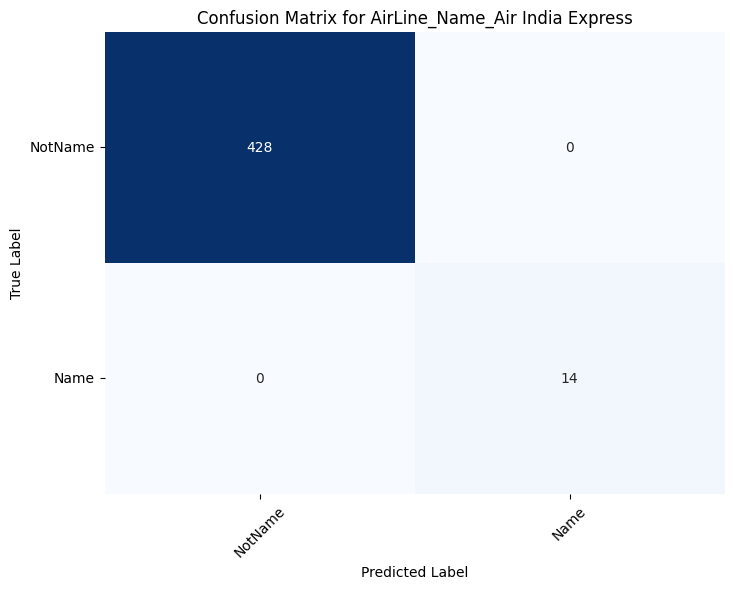

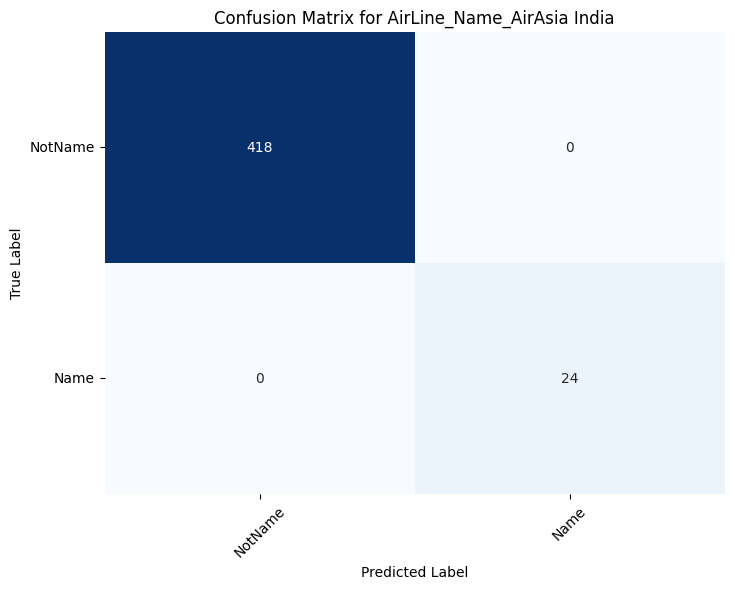

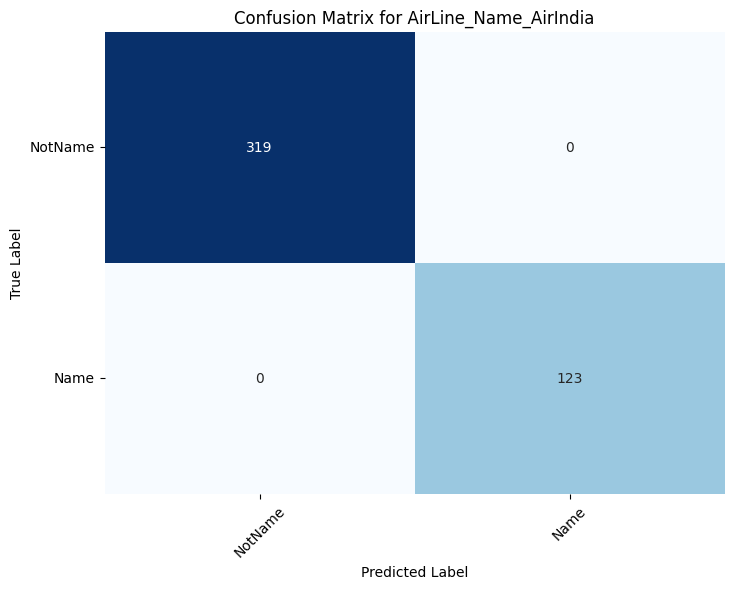

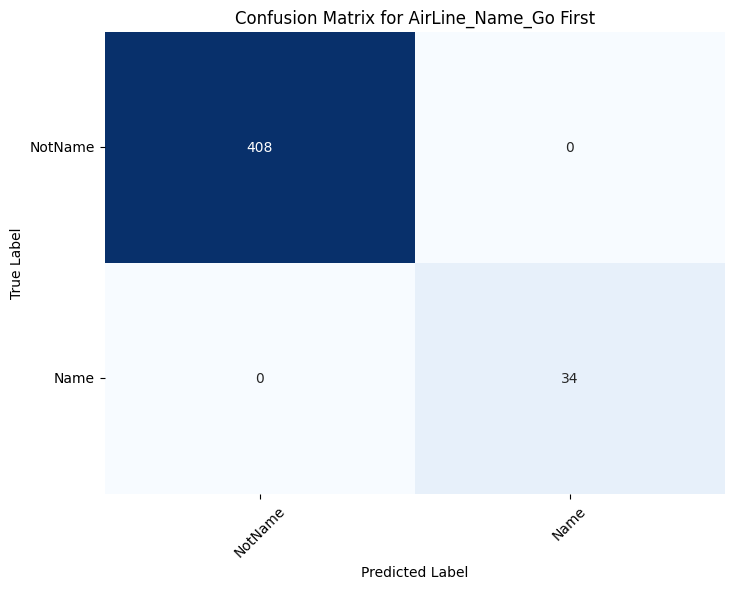

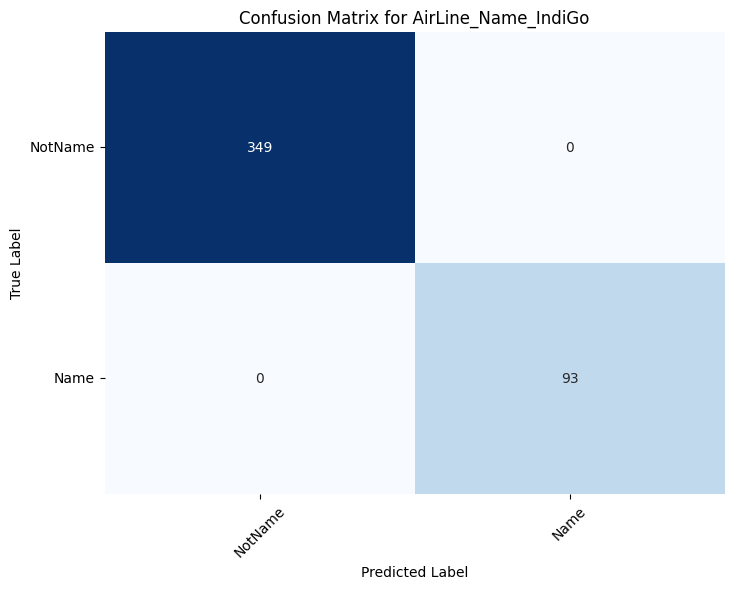

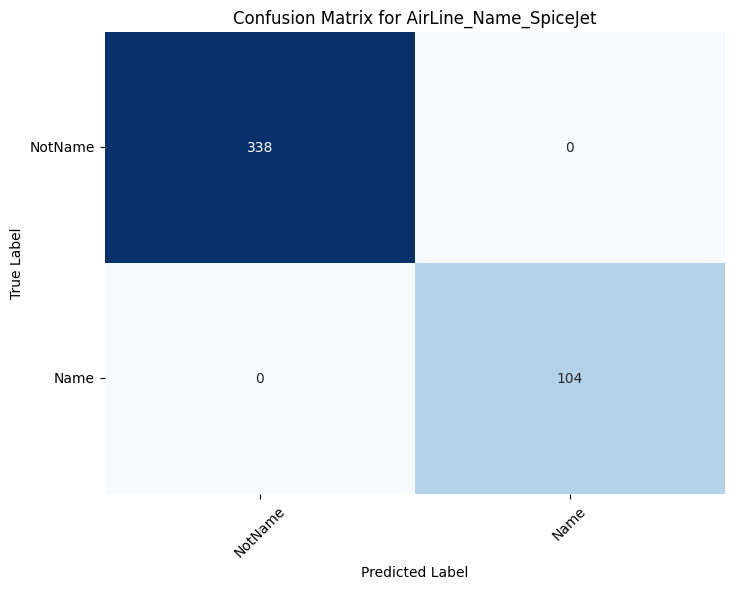

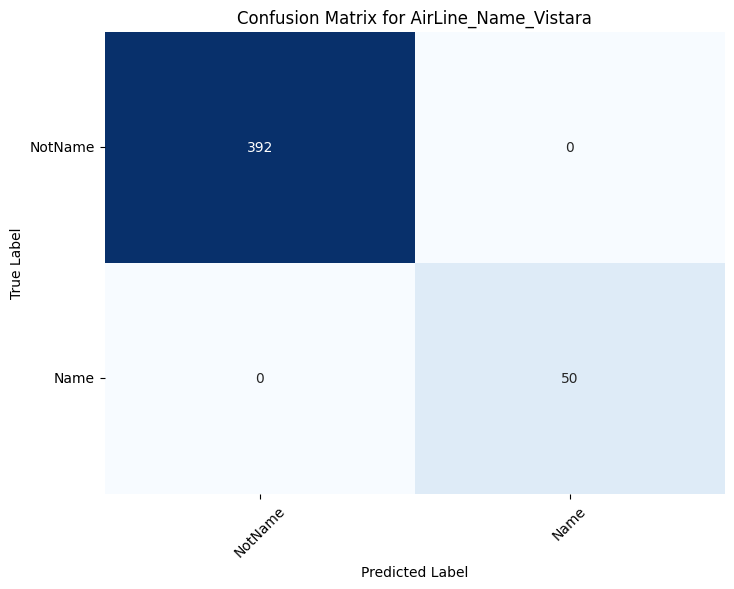

In [69]:
airline_columns=[col for col in df.columns if col.startswith('AirLine_Name_')]
for airline in airline_columns:
    X=df[['Average_Rating','Average_Sentiment']]
    y=df[airline]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    model=RandomForestClassifier(random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    cm=confusion_matrix(y_test,y_pred)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
    plt.title(f'Confusion Matrix for {airline}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=[0.5,1.5],labels=['Not'+airline.split('_')[1],airline.split('_')[1]],rotation=45)
    plt.yticks(ticks=[0.5,1.5],labels=['Not'+airline.split('_')[1],airline.split('_')[1]],rotation=0)
    plt.show()